# Лабораторная работа №1: Pandas


Yelp — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

---

yelp_academic_dataset_business.json
| Признак      | Описание                                  | Тип     |
| ------------ | ----------------------------------------- | ------- |
| business_id  | Уникальный идентификатор компании         | object  |
| name         | Название компании                         | object  |
| address      | Адрес компании                            | object  |
| city         | Город, в котором находится компания       | object  |
| state        | Штат, в котором находится компания        | object  |
| postal_code  | Почтовый индекс                           | object  |
| latitude     | Широта                                    | float64 |
| longitude    | Долгота                                   | float64 |
| stars        | Рейтинг компании (от 1 до 5)              | float64 |
| review_count | Количество отзывов                        | int64   |
| is_open      | Статус работы компании (1 — да, 0 — нет)  | int64   |
| attributes   | Атрибуты компании (например, доступность) | object  |
| categories   | Категории услуг компании                  | object  |
| hours        | Часы работы компании                      | object  |

yelp_academic_dataset_review.json
| Признак     | Описание                              | Тип        |
| ----------- | ------------------------------------- | ---------- |
| review_id   | Уникальный идентификатор отзыва       | object     |
| user_id     | Уникальный идентификатор пользователя | object     |
| business_id | Уникальный идентификатор компании     | object     |
| stars       | Рейтинг отзыва (от 1 до 5)            | int64      |
| useful      | Количество полезных голосов           | int64      |
| funny       | Количество голосов "смешно"           | int64      |
| cool        | Количество голосов "классно"          | int64      |
| text        | Текст отзыва                          | object     |
| date        | Дата написания отзыва                 | datetime64 |

## Считывание датасетов

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

In [100]:
data_business = pd.read_json('yelp_academic_dataset_business.json', lines=True)


## Типичные операции над датафреймом

In [101]:
data_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [102]:
data_business.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [103]:
# Считывание значения конкретной ячейки
data_business.at[random.randint(0,100), 'stars']

3.0

In [104]:
# Фильтрация набора данных по какому-либо условию.
high_rated = data_business[data_business['stars'] > 4.5]
len(high_rated) < len(data_business)

True

In [105]:
# удаление строк с пропущенными значениями;
df_dropped = data_business.dropna()
len(df_dropped) == len(data_business)

False

In [106]:
# заполнение пропущенных значений средним значением по колонке.
data_business.loc[0:5, 'stars'] = np.nan
data_business['stars'].fillna(data_business['stars'].mean(), inplace=True)

data_business.head(7)

C:\Users\eugene\AppData\Local\Temp\ipykernel_7844\3776409358.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_business['stars'].fillna(data_business['stars'].mean(), inplace=True)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,3.596721,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.596721,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.596721,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,3.596721,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,3.596721,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,3.596721,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.500000,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [107]:
# Создание нового поля, вычисленного на основе значений других полей:
data_business['rating_weighted'] = data_business['stars'] * data_business['review_count']
data_business['rating_weighted']

0          25.177045
1          53.950811
2          79.127857
3         287.737661
4          46.757370
             ...    
150341     39.000000
150342     20.000000
150343     28.000000
150344     96.000000
150345     40.500000
Name: rating_weighted, Length: 150346, dtype: float64

In [108]:
def categorize_business(row):
    return "Popular" if row['review_count'] > 100 else "Regular"

data_business['business_category'] = data_business.apply(categorize_business, axis=1)

data_business['is_high_rated'] = data_business['stars'].apply(lambda x: x >= 4.5)
data_business[data_business['is_high_rated']== True]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,rating_weighted,business_category,is_high_rated
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,1,{'ByAppointmentOnly': 'True'},"General Dentistry, Dentists, Health & Medical,...","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3...",50.0,Regular,True
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",450.0,Regular,True
16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,AZ,85705,32.229872,-110.972342,4.5,10,1,"{'DriveThru': 'False', 'BusinessAcceptsCreditC...","Automotive, Auto Parts & Supplies, Auto Custom...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...",45.0,Regular,True
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",922.5,Popular,True
25,PSo_C1Sfa13JHjzVNW6ziQ,Indian Walk Veterinary Center,662 Durham Rd,Newtown,PA,18940,40.273493,-74.987496,5.0,15,1,None,"Pet Services, Pet Groomers, Pets, Veterinarians","{'Monday': '8:0-19:0', 'Tuesday': '8:0-19:0', ...",75.0,Regular,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150334,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1",Philadelphia,PA,19103,39.945966,-75.169666,4.5,39,1,"{'ByAppointmentOnly': 'True', 'GoodForKids': '...","Health & Medical, Yoga, Shopping, Naturopathic...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",175.5,Regular,True
150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",157.5,Regular,True
150339,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",63.0,Regular,True
150340,hn9Toz3s-Ei3uZPt7esExA,West Side Kebab House,2470 Guardian Road NW,Edmonton,AB,T5T 1K8,53.509649,-113.675999,4.5,18,0,"{'Ambience': '{'touristy': False, 'hipster': F...","Middle Eastern, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",81.0,Regular,True


In [109]:
# Сортировка по количеству отзывов
sorted_df = data_business.sort_values(by='review_count', ascending=False)
sorted_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,rating_weighted,business_category,is_high_rated
113731,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,724 Iberville St,New Orleans,LA,70130,29.954273,-90.068965,4.0,7568,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ''fu...","Live/Raw Food, Seafood, Restaurants, Cajun/Creole","{'Monday': '11:0-22:0', 'Thursday': '11:0-22:0...",30272.0,Popular,False
112552,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,739 Conti St,New Orleans,LA,70130,29.956231,-90.067563,4.0,7400,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Seafood, Cajun/Creole, Breakfast ...","{'Monday': '8:0-1:0', 'Tuesday': '8:0-1:0', 'W...",29600.0,Popular,False
91757,GXFMD0Z4jEVZBCsbPf4CTQ,Hattie B’s Hot Chicken - Nashville,112 19th Ave S,Nashville,TN,37203,36.151387,-86.796603,4.5,6093,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","American (Traditional), Chicken Shop, Southern...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ...",27418.5,Popular,True
143157,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,51 N 12th St,Philadelphia,PA,19107,39.953341,-75.158855,4.5,5721,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Candy Stores, Shopping, Department Stores, Fas...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",25744.5,Popular,True
147081,oBNrLz4EDhiscSlbOl8uAw,Ruby Slipper - New Orleans,200 Magazine St,New Orleans,LA,70130,29.951025,-90.067394,4.5,5193,1,"{'NoiseLevel': ''loud'', 'Caters': 'False', 'B...","Restaurants, American (Traditional), American ...","{'Monday': '0:0-0:0', 'Tuesday': '7:30-14:0', ...",23368.5,Popular,True


In [110]:
# Вычисление нескольких статистик по колонкам
data_business[['stars', 'review_count']].agg(['mean', 'median', 'min', 'max'])


,stars,review_count
mean,3.596721,44.866561
median,3.500000,15.000000
min,1.000000,5.000000
max,5.000000,7568.000000


In [111]:
# Вывод количества значений по категориям
data_business['city'].value_counts()

city
Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: count, Length: 1416, dtype: int64

In [112]:
# Уникальные значения в колонке 'state'
data_business['state'].unique()

array(['CA', 'MO', 'AZ', 'PA', 'TN', 'FL', 'IN', 'LA', 'AB', 'NV', 'ID',
       'DE', 'IL', 'NJ', 'NC', 'CO', 'WA', 'HI', 'UT', 'TX', 'MT', 'MI',
       'SD', 'XMS', 'MA', 'VI', 'VT'], dtype=object)

## Продемонстрировать работу `.groupby`, на основе группировок в groupby вычислить агрегатные функции по одной или нескольким колонкам.



In [113]:
# Пять городов, по которым присутствует информация о наибольшем количестве компаний
city_counts = data_business.groupby('city')['business_id'].count().reset_index()

city_counts.columns = ['city', 'company_count']

top_cities = city_counts.sort_values(by='company_count', ascending=False).head(5)
top_cities

,city,company_count
866,Philadelphia,14569
1210,Tucson,9250
1157,Tampa,9050
511,Indianapolis,7540
745,Nashville,6971


## Решейпинг данных 1D→2D с использованием `.pivot`
можно подать на вход результаты агрегатов, полученных ранее с использованием .groupby (сгруппировать по двум полям)

In [ ]:
data_review = pd.read_json('yelp_academic_dataset_review.json', lines=True)

### Для уменьшения таблицы оставим только город с наибольшим количеством компаний

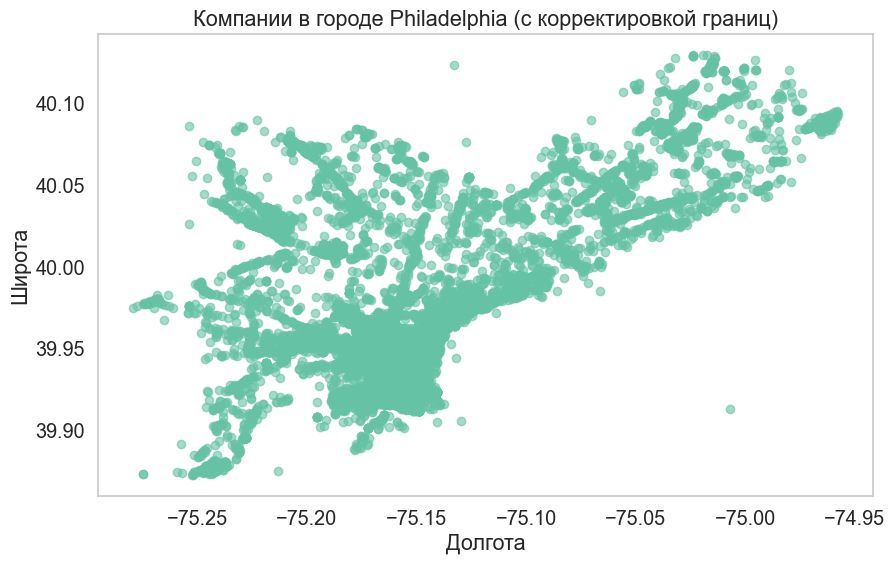

In [ ]:
data_business = data_business[data_business['city'] == 'Philadelphia']

# Задаем границы для Филадельфии
min_longitude, max_longitude = -75.28, -74.95
min_latitude, max_latitude = 39.87, 40.13

# Фильтрация данных на основе границ
filtered_data = data_business[
    (data_business['longitude'] >= min_longitude) & 
    (data_business['longitude'] <= max_longitude) & 
    (data_business['latitude'] >= min_latitude) & 
    (data_business['latitude'] <= max_latitude)
]

# Визуализация отфильтрованных данных
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['longitude'], filtered_data['latitude'], alpha=0.6)
plt.title('Компании в городе Philadelphia (с корректировкой границ)')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.grid()
plt.show()

In [ ]:
philadelphia_business_ids = filtered_data['business_id'].tolist()

data_review.set_index('business_id', inplace=True)
philadelphia_reviews = data_review.loc[philadelphia_business_ids]
philadelphia_reviews.reset_index(inplace=True)

In [ ]:
review_stats = philadelphia_reviews.groupby('business_id').aggregate(
    avg_rating=('stars', 'mean'),  # Средняя оценка
    num_reviews=('stars', 'count')  # Количество отзывов
).reset_index()
review_stats

,business_id,avg_rating,num_reviews
0,--OS_I7dnABrXvRCCuWOGQ,4.200000,5
1,--sXnWH9Xm6_NvIjyuA99w,4.103448,29
2,-0M0b-XhtFagyLmsBtOe8w,3.722222,18
3,-0PN_KFPtbnLQZEeb23XiA,3.363636,11
4,-0TffRSXXIlBYVbb5AwfTg,4.355124,1132
...,...,...,...
14510,zyge4T5eSiPHq1-IaJb_Qg,1.800000,10
14511,zyghhZzPgb1bRAIYB-oi1w,5.000000,12
14512,zz-fcqurtm77bZ_rVvo2Lw,4.480000,25
14513,zz3E7kmJI2r2JseE6LAnrw,3.718447,103


In [ ]:
# Устанавливаем 'business_id' в качестве индекса для обеих таблиц 
filtered_data.set_index('business_id', inplace=True) 
review_stats.set_index('business_id', inplace=True) 
 
# Объединяем таблицы 
combined_data = filtered_data.join(review_stats, how='inner') 
 
# Выбираем нужные колонки 
combined_data = combined_data[['latitude', 'longitude', 'categories', 'name', 'avg_rating', 'num_reviews']]
 
# Выводим полученную таблицу 
combined_data


KeyError: "None of ['business_id'] are in the columns"

## Решейпинг 1D→2D данных, соединённых с группировкой / агрегацией (одним словом - сводная таблица): `.pivot_table`
Группировать только по категориальным полям или числовым, если значений немного.

